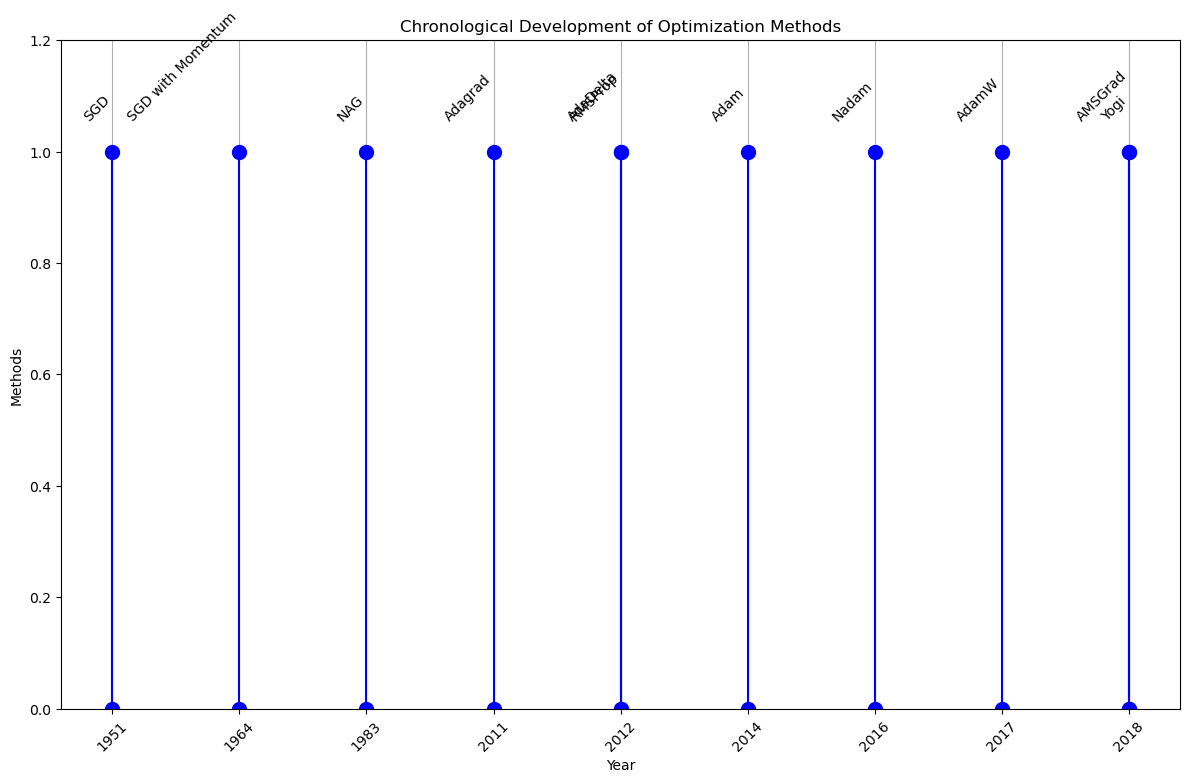

In [1]:
import matplotlib.pyplot as plt

# Data for the timeline
methods = [
    ("1951", "SGD"),
    ("1964", "SGD with Momentum"),
    ("1983", "NAG"),
    ("2011", "Adagrad"),
    ("2012", "RMSProp"),
    ("2012", "AdaDelta"),
    ("2014", "Adam"),
    ("2016", "Nadam"),
    ("2017", "AdamW"),
    ("2018", "AMSGrad"),
    ("2018", "Yogi")
]

# Extracting years and method names
years, method_names = zip(*methods)

# Plotting the timeline
plt.figure(figsize=(12, 8))

# Plotting vertical lines for each method
for i, (year, method) in enumerate(methods):
    plt.plot([year, year], [0, 1], marker='o', color='b', markersize=10, linestyle='-')
    plt.text(year, 1.05, method, rotation=45, ha='right', va='bottom')

# Adding details to the timeline
plt.title("Chronological Development of Optimization Methods")
plt.xlabel("Year")
plt.ylabel("Methods")
plt.xticks(rotation=45)
plt.ylim(0, 1.2)
plt.grid(axis='x')

plt.tight_layout()
plt.show()


C:\Users\werka\miniconda3\envs\py310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\werka\miniconda3\envs\py310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\werka\miniconda3\envs\py310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


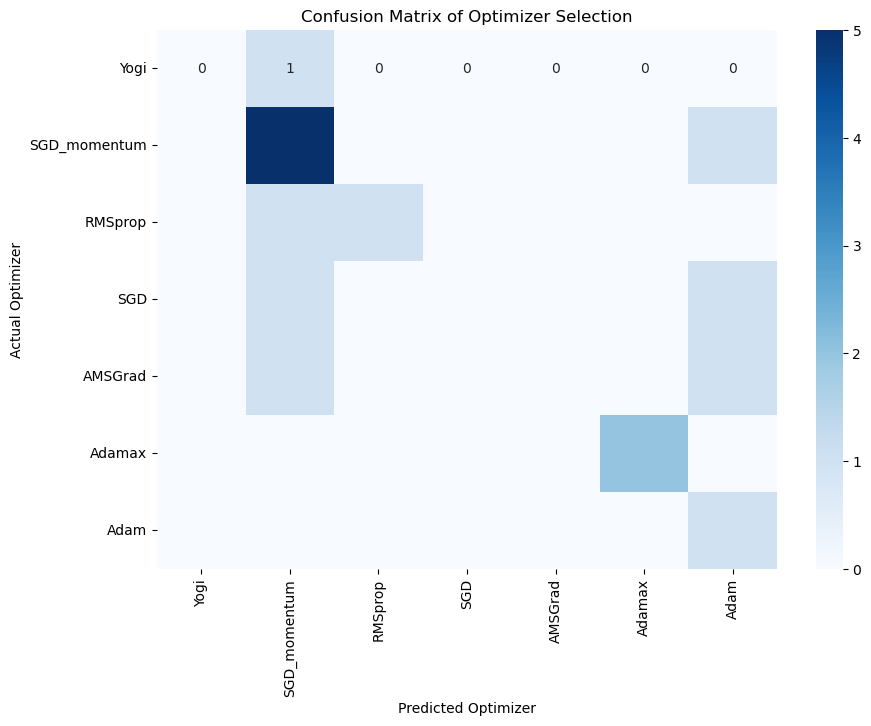

Classification Report:
              precision    recall  f1-score   support

     AMSGrad       0.00      0.00      0.00         1
        Adam       0.56      0.83      0.67         6
      Adamax       1.00      0.50      0.67         2
     RMSprop       0.00      0.00      0.00         2
         SGD       0.00      0.00      0.00         2
SGD_momentum       1.00      1.00      1.00         2
        Yogi       0.25      1.00      0.40         1

    accuracy                           0.56        16
   macro avg       0.40      0.48      0.39        16
weighted avg       0.47      0.56      0.48        16



In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

def select_optimizer(data_name, metric, df):
    """
    Select the best optimizer based on the given data name, evaluation metric, 
    and the information in the provided DataFrame.

    Parameters:
    - data_name: str, name of the dataset
    - metric: str, evaluation metric (e.g., 'F1-score', 'Training Time')
    - df: pandas DataFrame, containing dataset information
    
    Returns:
    - str, the selected optimizer
    """
    # Get the corresponding rows for the given data name
    data_df = df[df['Data Name'] == data_name]
    
    # Extract the necessary values
    data_size = data_df['Data Size'].iloc[0]
    neural_network = data_df['Neural Network Architecture'].iloc[0]
    target_feature_type = data_df['Target Feature Type'].iloc[0]

    # Complex decision rules based on data analysis
    if data_size < 1000:
        if neural_network == 'FNN':
       
                    return 'Yogi'
          
        elif neural_network == 'CNN':
           
                    return 'Adam'
           
        elif neural_network == 'LSTM':
        
                return 'Adam'
        
    elif data_size < 5000:
        if neural_network == 'FNN':
           
                return 'SGD_momentum'
            
        elif neural_network == 'CNN':
         
                return 'Adam'
         
        elif neural_network == 'LSTM':
           
                return 'Adam'
          
    elif data_size >= 5000:
        if neural_network == 'FNN':
           
                return 'Adamax'
          
        elif neural_network == 'CNN':
          
                return 'Adam'
          
        elif neural_network == 'LSTM':
          
                return 'Adam'
           
    
    return "Adam"

# Load the CSV file
csv_file = 'neural_network_results-15-05.csv'
df = pd.read_csv(csv_file)

# Normalize F1-score and Training Time
df['Normalized F1-score'] = df['F1-score'] / df['F1-score'].max()
df['Normalized Training Time'] = df['Training Time'].max() / df['Training Time']

# Create a composite score
df['Composite Score'] = df['Normalized F1-score'] * 1.0 + df['Normalized Training Time'] * 0.0

# Generate predictions and actual values
predicted_optimizers = []
actual_optimizers = []

for data_name in df['Data Name'].unique():
    # Filter rows for the specific dataset
    data_df = df[df['Data Name'] == data_name]
    # Determine the actual best optimizer based on highest F1-score
    best_optimizer = data_df.loc[data_df['Composite Score'].idxmax(), 'Optimization Method']
    actual_optimizers.append(best_optimizer)
    # Get predicted optimizer
    predicted_optimizer = select_optimizer(data_name, 'F1-score', df)
    predicted_optimizers.append(predicted_optimizer)

# Compute the confusion matrix
cm = confusion_matrix(actual_optimizers, predicted_optimizers)
report = classification_report(actual_optimizers, predicted_optimizers)

# Visualization of Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=set(actual_optimizers), yticklabels=set(actual_optimizers))
plt.xlabel('Predicted Optimizer')
plt.ylabel('Actual Optimizer')
plt.title('Confusion Matrix of Optimizer Selection')
plt.show()

# Print classification report
print("Classification Report:")
print(report)

In [4]:
# import pandas as pd
# import matplotlib.pyplot as plt
# from sklearn.metrics import confusion_matrix, classification_report
# import seaborn as sns

# def select_optimizer(data_name, metric, df):
#     """
#     Select the best optimizer based on the given data name, evaluation metric, 
#     and the information in the provided DataFrame.

#     Parameters:
#     - data_name: str, name of the dataset
#     - metric: str, evaluation metric (e.g., 'F1-score', 'Training Time')
#     - df: pandas DataFrame, containing dataset information
    
#     Returns:
#     - str, the selected optimizer
#     """
#     # Get the corresponding rows for the given data name
#     data_df = df[df['Data Name'] == data_name]
    
#     # Extract the necessary values
#     data_size = data_df['Data Size'].iloc[0]
#     neural_network = data_df['Neural Network Architecture'].iloc[0]
#     target_feature_type = data_df['Target Feature Type'].iloc[0]

#     # Complex decision rules based on data analysis
#     if data_size < 1000:
#         if neural_network == 'FNN':
#         #     if metric == 'F1-score':
#         #         if target_feature_type == 'float32':
#                 #     return 'Adam'
#                 # else:
#                     return 'Yogi'
#             # elif metric == 'Training Time':
#             #     return 'Nesterov'
#         elif neural_network == 'CNN':
#             # if metric == 'F1-score':
#             #     if target_feature_type == 'float32':
#             #         return 'Adamax'
#             #     else:
#                     return 'Adam'
#             # elif metric == 'Training Time':
#             #     return 'Nesterov'
#         elif neural_network == 'LSTM':
#             # if metric == 'F1-score':
#                 return 'Adam'
#             # elif metric == 'Training Time':
#             #     return 'AMSGrad'
#     elif data_size < 4000:
#         if neural_network == 'FNN':
#             # if metric == 'F1-score':
#                 return 'SGD_momentum'
#             # elif metric == 'Training Time':
#             #     return 'Adam'
#         elif neural_network == 'CNN':
#             # if metric == 'F1-score':
#                 return 'Adam'
#             # elif metric == 'Training Time':
#             #     return 'SGD_momentum'
#         elif neural_network == 'LSTM':
#             # if metric == 'F1-score':
#                 return 'Adam'
#             # elif metric == 'Training Time':
#             #     return 'RMSProp'
#     elif data_size >= 4000:
#         if neural_network == 'FNN':
#             # if metric == 'F1-score':
#                 return 'Adamax'
#             # elif metric == 'Training Time':
#             #     return 'SGD_momentum'
#         elif neural_network == 'CNN':
#             # if metric == 'F1-score':
#                 return 'Adam'
#             # elif metric == 'Training Time':
#             #     return 'SGD_momentum'
#         elif neural_network == 'LSTM':
#             # if metric == 'F1-score':
#                 return 'Adam'
#             # elif metric == 'Training Time':
#             #     return 'RMSProp'
    
#     return "Adam"

# # Load the CSV file
# csv_file = 'neural_network_results-15-05.csv'
# df = pd.read_csv(csv_file)

# # Normalize F1-score and Training Time
# df['Normalized F1-score'] = df['F1-score'] / df['F1-score'].max()
# df['Normalized Training Time'] = df['Training Time'].max() / df['Training Time']

# # Create a composite score
# df['Composite Score'] = df['Normalized F1-score'] * 1.0 + df['Normalized Training Time'] * 0.0

# # Generate predictions and actual values
# predicted_optimizers = []
# actual_optimizers = []

# for data_name in df['Data Name'].unique():
#     # Filter rows for the specific dataset
#     data_df = df[df['Data Name'] == data_name]
#     # Determine the actual best optimizer based on highest F1-score
#     best_optimizer = data_df.loc[data_df['Composite Score'].idxmax(), 'Optimization Method']
#     actual_optimizers.append(best_optimizer)
#     # Get predicted optimizer
#     predicted_optimizer = select_optimizer(data_name, 'F1-score', df)
#     predicted_optimizers.append(predicted_optimizer)

# # Compute the confusion matrix
# cm = confusion_matrix(actual_optimizers, predicted_optimizers)
# report = classification_report(actual_optimizers, predicted_optimizers)

# # Visualization of Confusion Matrix
# plt.figure(figsize=(10, 7))
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=set(actual_optimizers), yticklabels=set(actual_optimizers))
# plt.xlabel('Predicted Optimizer')
# plt.ylabel('Actual Optimizer')
# plt.title('Confusion Matrix of Optimizer Selection')
# plt.show()

# # Print classification report
# print("Classification Report:")
# print(report)